In [ ]:
# Download the stack sample zip file 
!wget https://www.dropbox.com/scl/fi/bnabda9cee2yuyi6wesmv/stacksample.zip?rlkey=sucdc1cm2m7fnwtzhykv24g8z&e=1

In [1]:
# Download the required packages 
!pip install tensorflow
!pip install numpy==1.23.5  pandas==2.0.3  
import numpy as np
import pandas as pd
# for counting
import collections



  Obtaining dependency information for numpy==1.23.5 from https://files.pythonhosted.org/packages/b8/d0/e6a2cb9a3f3e863a43e50949e9ae704be70baf398fd5af59355f65c8740a/numpy-1.23.5-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached numpy-1.23.5-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-macosx_11_0_arm64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.


In [2]:
# unzip the stacksample.zip
!unzip /content/stacksample.zip?rlkey=sucdc1cm2m7fnwtzhykv24g8z


zsh:1: no matches found: /content/stacksample.zip?rlkey=sucdc1cm2m7fnwtzhykv24g8z


In [3]:
# read the Question.csv file 
ques = pd.read_csv('/Users/nikita/Downloads/stacksample/Questions.csv',encoding='latin-1')
ques.head(10)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
6,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,580,91.0,2008-08-02T23:30:59Z,NaN,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
8,650,143.0,2008-08-03T11:12:52Z,NaN,79,Automatically update version number,<p>I would like the version property of my app...
9,810,233.0,2008-08-03T20:35:01Z,NaN,9,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...


In [4]:
# Drop the column OwnerUserId , CreationDate , ClosedDate , Score
ques.drop(["OwnerUserId","CreationDate","ClosedDate","Score"], axis=1, inplace=True)
ques.head(10)

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,330,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
6,470,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,580,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
8,650,Automatically update version number,<p>I would like the version property of my app...
9,810,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...


In [5]:
# function to remove the HTML Tags
import re
def remove_html_tags(text):
    clean_text = re.sub(r'<.*?>', '', text)  # Regular expression to remove HTML tags
    return clean_text

In [6]:
# Apply the remove_html_tags to the Body column in Question.csv
ques['Body'] = ques['Body'].apply(remove_html_tags)
ques.head()

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,I've written a database generation script in S...
1,90,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...
2,120,ASP.NET Site Maps,Has anyone got experience creating SQL-based A...
3,180,Function for creating color wheels,This is something I've pseudo-solved many time...
4,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...


In [7]:
ques.to_csv('/Users/nikita/Downloads/stacksample/question_clean.csv',index=False)

In [8]:
# Plotting Libs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# magic function
%matplotlib inline
import collections

In [9]:
# Read the Tags.csv file
df_tags = pd.read_csv('/Users/nikita/Downloads/stacksample/Tags.csv')

In [10]:
def plot_tags(tagCount):

    x,y = zip(*tagCount)

    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired
    colors = [colormap(i) for i in np.linspace(0, 0.8,50)]

    area = [i/4000 for i in list(y)]   # 0 to 15 point radiuses
    plt.figure(figsize=(9,8))
    plt.ylabel("Number of question associations")
    for i in range(len(y)):
        plt.plot(i,y[i], marker='o', linestyle='',ms=area[i],label=x[i])

    plt.legend(numpoints=1)
    plt.show()

[('javascript', 124155), ('java', 115212), ('c#', 101186), ('php', 98808), ('android', 90659), ('jquery', 78542), ('python', 64601), ('html', 58976), ('c++', 47591), ('ios', 47009)]


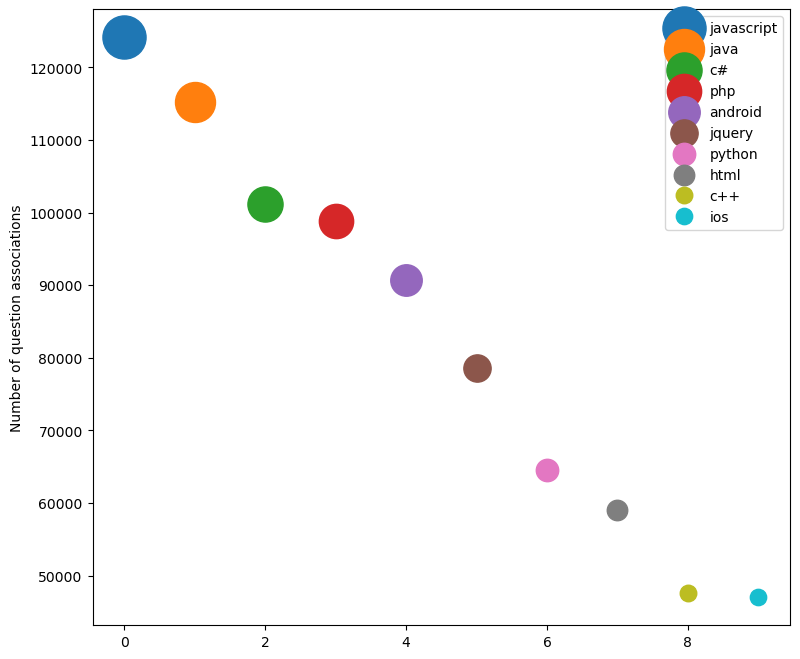

In [11]:
#This line of code is using the collections.Counter class to count the frequency of each tag in the df_tags DataFrame and then get the 10 most common tags.
tagCount =  collections.Counter(list(df_tags['Tag'])).most_common(10)
print(tagCount)
plot_tags(tagCount)

In [12]:
# Declare the top 10 tags in variable top10
top10=['javascript','java','c#','php','android','jquery','python','html','c++','ios']

In [13]:
#This line is creating a new DataFrame called tag_top10 by filtering 
# the df_tags DataFrame. 
#It selects only the rows where the 'Tag' column value is present in the top10 list.
tag_top10= df_tags[df_tags.Tag.isin(top10)]
print (tag_top10.shape)
tag_top10.head()

(826739, 2)


,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#


In [14]:
#This code snippet is designed to find the 10 most frequent Id values 
#within the tag_top10 DataFrame and display their counts.
tag_top10['Id'].value_counts().head(10)

Id
4009250     5
30798790    5
30289880    5
23484760    5
35318730    5
23267320    5
30991580    5
31085960    5
35283570    5
11648170    5
Name: count, dtype: int64

In [15]:
#This part filters the tag_top10 DataFrame to select only the rows 
#where the 'Id' column matches the 'Id' value from the input 
#question_id row.
def add_tags(question_id):
    return tag_top10[tag_top10['Id'] == question_id['Id']].Tag.values #This part filters the tag_top10 DataFrame to select only the rows where the 'Id' column matches the 'Id' value from the input question_id row.

top10 = tag_top10.apply(add_tags, axis=1)
print(top10.head())

14     [c#]
18    [c++]
28     [c#]
35     [c#]
39     [c#]
dtype: object


In [16]:
len(top10),tag_top10.shape

(826739, (826739, 2))

In [17]:
#combine two DataFrames (or Series) horizontally, adding a 
#new column called 'Tags' to the tag_top10 DataFrame.
tag_top10=pd.concat([tag_top10, top10.rename('Tags')], axis=1)
tag_top10.head()

,Id,Tag,Tags
14,260,c#,[c#]
18,330,c++,[c++]
28,650,c#,[c#]
35,930,c#,[c#]
39,1010,c#,[c#]


In [18]:
tag_top10.drop(["Tag"], axis=1, inplace=True)
tag_top10.shape

(826739, 2)

In [19]:
#This line aims to remove duplicate rows from the tag_top10 DataFrame and 
#store the resulting unique rows in a new DataFrame called top10_tags.
top10_tags=tag_top10.loc[tag_top10.astype(str).drop_duplicates().index]

In [20]:
total=pd.merge(ques, top10_tags, on='Id')
print(total.shape)
total.head()

(706336, 4)


,Id,Title,Body,Tags
0,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...,[c#]
1,330,Should I use nested classes in this case?,I am working on a collection of classes used f...,[c++]
2,650,Automatically update version number,I would like the version property of my applic...,[c#]
3,930,How do I connect to a database and loop over a...,What's the simplest way to connect and query a...,[c#]
4,1010,"How to get the value of built, encoded ViewState?",I need to grab the base64-encoded representati...,[c#]


In [21]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [22]:
#This code is using the MultiLabelBinarizer class from 
#scikit-learn to transform a list of tags into a binary matrix 
#representation suitable for multi-label classification tasks.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(total.Tags)
labels = multilabel_binarizer.classes_
labels

array(['android', 'c#', 'c++', 'html', 'ios', 'java', 'javascript',
       'jquery', 'php', 'python'], dtype=object)

In [23]:
#This line is using the train_test_split function from scikit-learn to split 
#the total DataFrame into two subsets: train and test. 
train,test=train_test_split(total[:550000],test_size=0.25,random_state=24)

In [24]:
train.shape,test.shape

((412500, 4), (137500, 4))

In [25]:
X_train_t=train['Title']
X_train_b=train['Body']
y_train=multilabel_binarizer.transform(train['Tags'])
X_test_t=test['Title']
X_test_b=test['Body']
y_test=multilabel_binarizer.transform(test['Tags'])

In [26]:
!pip install nltk

import nltk
nltk.download('punkt')

from nltk import word_tokenize
#This code is calculating the maximum length of sentences 
sent_lens_t=[]
for sent in train['Title']:
    sent_lens_t.append(len(word_tokenize(sent)))
max(sent_lens_t)

[nltk_data] Downloading package punkt to /Users/nikita/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


60

In [27]:
#This line is using the np.quantile 
#function from the NumPy library to calculate the 97th percentile 
#of the sent_lens_t data.
np.quantile(sent_lens_t,0.97)

18.0

In [28]:
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import pad_sequences

#This code involves tokenization, creating sequences of numerical 
#representations of words, 
#and padding those sequences to a uniform length.


max_len_t = 18
tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(list(X_train_t) + list(X_test_t))
sequences_train_t = tok.texts_to_sequences(X_train_t)
sequences_matrix_train_t = pad_sequences(sequences_train_t, maxlen=max_len_t,padding='post', truncating='post')

  Obtaining dependency information for numpy<2.1.0,>=1.26.0 from https://files.pythonhosted.org/packages/4a/d9/32de45561811a4b87fbdee23b5797394e3d1504b4a7cf40c10199848893e/numpy-2.0.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached numpy-2.0.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp311-cp311-macosx_11_0_arm64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 2.0.2 which is incompatible.


In [29]:
#This line is calculating the size of the vocabulary learned by the tokenizer (tok) 
#and storing it in a variable called vocab_len_t.
vocab_len_t=len(tok.index_word.keys())
vocab_len_t

81079

In [30]:
from keras.preprocessing import sequence

In [31]:
#This code is padding the sequences of tokenized training 
#titles (sequences_train_t) to a uniform length using the 
#pad_sequences function from Keras.
sequences_matrix_train_t = sequence.pad_sequences(sequences_train_t,maxlen=max_len_t)
sequences_matrix_train_t

array([[    0,     0,     0, ...,     1,   941,   200],
       [    0,     0,     0, ..., 10104,    45,   537],
       [    0,     0,     0, ...,   147,     8,   231],
       ...,
       [    0,     0,     0, ...,    10,    72,  2926],
       [    0,     0,     0, ...,     2,    18,    75],
       [    0,     0,     0, ..., 12746,   797,   259]], dtype=int32)

In [32]:
#This code is preparing the text data in the 'Title' column of your 
#testing dataset (X_test_t) for use in a deep learning model, 
#and then it retrieves the shapes of the training and testing data, 
#including the target variables (y_train, y_test).
sequences_test_t = tok.texts_to_sequences(X_test_t)
sequences_matrix_test_t = sequence.pad_sequences(sequences_test_t,maxlen=max_len_t)
sequences_matrix_train_t.shape,sequences_matrix_test_t.shape,y_train.shape,y_test.shape

((412500, 18), (137500, 18), (412500, 10), (137500, 10))

In [33]:
#This code is calculating the maximum length of sentences 
#within the 'Body' column of the train DataFrame.
sent_lens_b=[]
for sent in train['Body']:
    sent_lens_b.append(len(word_tokenize(sent)))
max(sent_lens_b)

20868

In [34]:
np.quantile(sent_lens_b,0.90)

578.0

In [35]:
max_len_b = 600
tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(X_train_b)
sequences_train_b = tok.texts_to_sequences(X_train_b)

In [36]:
vocab_len_b =len(tok.index_word.keys())
vocab_len_b

1292018

In [37]:
sequences_matrix_train_b = sequence.pad_sequences(sequences_train_b,maxlen=max_len_b)
sequences_matrix_train_b

array([[   0,    0,    0, ...,   51, 2082,   91],
       [   0,    0,    0, ..., 1408,  203,  825],
       [   0,    0,    0, ...,   34,   51,   83],
       ...,
       [   0,    0,    0, ...,   20,   68,  687],
       [   0,    0,    0, ...,  187,   58,   10],
       [   0,    0,    0, ...,  194,  197,   10]], dtype=int32)

In [38]:
sequences_test_b = tok.texts_to_sequences(X_test_b)
sequences_matrix_test_b = sequence.pad_sequences(sequences_test_b,maxlen=max_len_b)

In [39]:
sequences_matrix_train_t.shape,sequences_matrix_train_b.shape,y_train.shape

((412500, 18), (412500, 600), (412500, 10))

In [40]:
sequences_matrix_test_t.shape,sequences_matrix_test_b.shape,y_test.shape

((137500, 18), (137500, 600), (137500, 10))

In [41]:
from tensorflow.keras.layers import Input, Embedding, GRU, Dense, Dropout, BatchNormalization, concatenate
from tensorflow.keras.models import Model
def RNN():
    # Title Only
    title_input = Input(name='title_input',shape=[max_len_t])
    title_Embed = Embedding(vocab_len_t+1,2000,input_length=max_len_t,mask_zero=True,name='title_Embed')(title_input)
    gru_out_t = GRU(300)(title_Embed)
    # auxiliary output to tune GRU weights smoothly
    auxiliary_output = Dense(10, activation='sigmoid', name='aux_output')(gru_out_t)

    # Body Only
    body_input = Input(name='body_input',shape=[max_len_b])
    body_Embed = Embedding(vocab_len_b+1,170,input_length=max_len_b,mask_zero=True,name='body_Embed')(body_input)
    gru_out_b = GRU(200)(body_Embed)

    # combined with GRU output
    com = concatenate([gru_out_t, gru_out_b])

    # now the combined data is being fed to dense layers
    dense1 = Dense(400,activation='relu')(com)
    dp1 = Dropout(0.5)(dense1)
    bn = BatchNormalization()(dp1)
    dense2 = Dense(150,activation='relu')(bn)

    main_output = Dense(10, activation='sigmoid', name='main_output')(dense2)

    model = Model(inputs=[title_input, body_input],outputs=[main_output, auxiliary_output])
    return model

In [42]:
model = RNN()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title_input         │ (None, 18)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ body_input          │ (None, 600)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ title_Embed         │ (None, 18, 2000)  │ 162,160,0… │ title_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 18)        │          0 │ title_input[0][0] │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ body_Embed          │ (None, 600, 170)  │ 219,643,2… │ body_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, 600)       │          0 │ body_input[0][0]  │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru (GRU)           │ (None, 300)       │  2,071,800 │ title_Embed[0][0… │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_1 (GRU)         │ (None, 200)       │    223,200 │ body_Embed[0][0], │
│                     │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 500)       │          0 │ gru[0][0],        │
│ (Concatenate)       │                   │            │ gru_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 400)       │    200,400 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 400)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 400)       │      1,600 │ dropout[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 150)       │     60,150 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ main_output (Dense) │ (None, 10)        │      1,510 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aux_output (Dense)  │ (None, 10)        │      3,010 │ gru[0][0]         │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 384,364,900 (1.43 GB)

 Trainable params: 384,364,100 (1.43 GB)

 Non-trainable params: 800 (3.12 KB)

In [43]:
model.compile(optimizer='adam',
              loss={'main_output': 'categorical_crossentropy', 'aux_output': 'categorical_crossentropy'},
              metrics={'main_output': ['accuracy'], 'aux_output': ['accuracy']}) # Provide metrics for both outputs

In [ ]:
results=model.fit({'title_input': sequences_matrix_train_t, 'body_input': sequences_matrix_train_b},
          {'main_output': y_train, 'aux_output': y_train},
          validation_data=[{'title_input': sequences_matrix_test_t, 'body_input': sequences_matrix_test_b},
          {'main_output': y_test, 'aux_output': y_test}],
          epochs=5, batch_size=1000)

Epoch 1/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 12384s 30s/step - aux_output_accuracy: 0.4915 - aux_output_loss: 2.1409 - loss: 9.2979 - main_output_accuracy: 0.3696 - main_output_loss: 7.1571 - val_aux_output_accuracy: 0.5225 - val_aux_output_loss: 2.2625 - val_loss: 18.9898 - val_main_output_accuracy: 0.1849 - val_main_output_loss: 16.7220
Epoch 2/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 17772s 43s/step - aux_output_accuracy: 0.5149 - aux_output_loss: 2.3491 - loss: 51.9496 - main_output_accuracy: 0.1410 - main_output_loss: 49.6008 - val_aux_output_accuracy: 0.5153 - val_aux_output_loss: 2.6240 - val_loss: 130.7877 - val_main_output_accuracy: 0.1390 - val_main_output_loss: 128.1569
Epoch 3/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 18954s 46s/step - aux_output_accuracy: 0.5069 - aux_output_loss: 2.7651 - loss: 174.3587 - main_output_accuracy: 0.1104 - main_output_loss: 171.5950 - val_aux_output_accuracy: 0.4752 - val_aux_output_loss: 3.2639 - val_loss: 451.2579 - val_main_output_accuracy: 0.1158 - val_main_output_